Keras documentation

https://keras.io/api/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from keras import Model 
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, Reshape, Input
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from keras.datasets.fashion_mnist import load_data
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
(x_train,y_train),(x_test,y_test) = load_data() 
x_train = x_train[...,np.newaxis]
x_test = x_test[...,np.newaxis]

x_train = x_train/255.
x_test = x_test/255.

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
class_names = ['T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']


In [ ]:
# 모델 구성 및 컴파일

def build_model():
  model = Sequential()
  input = Input(shape=(28,28,1))
  output = Conv2D(filters=32, kernel_size=(3,3))(input)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Flatten()(output)
  output = Dense(128,activation='relu')(output)
  output = Dense(64,activation='relu')(output)
  output = Dense(10,activation='softmax')(output)

  model = Model(inputs = [input], outputs=output)
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', # 예측값을 정수로 처리
                metrics=['acc'])
  return model 
model_1 = build_model()
model_1.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 30976)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               3965056   
                                                                 
 dense_4 (Dense)             (None, 64)                8256

In [ ]:
hist_1=model_1.fit(x_train,y_train,
                   epochs=25,
                   validation_split=0.3,
                   batch_size=128)

Epoch 1/25
329/329 [==============================] - 13s 14ms/step - loss: 0.5008 - acc: 0.8205 - val_loss: 0.3892 - val_acc: 0.8619
Epoch 2/25
329/329 [==============================] - 4s 13ms/step - loss: 0.3372 - acc: 0.8766 - val_loss: 0.3664 - val_acc: 0.8675
Epoch 3/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2839 - acc: 0.8950 - val_loss: 0.3613 - val_acc: 0.8716
Epoch 4/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2365 - acc: 0.9124 - val_loss: 0.3619 - val_acc: 0.8763
Epoch 5/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2034 - acc: 0.9238 - val_loss: 0.4080 - val_acc: 0.8666
Epoch 6/25
329/329 [==============================] - 4s 13ms/step - loss: 0.1769 - acc: 0.9342 - val_loss: 0.4506 - val_acc: 0.8685
Epoch 7/25
329/329 [==============================] - 4s 13ms/step - loss: 0.1536 - acc: 0.9432 - val_loss: 0.4671 - val_acc: 0.8688
Epoch 8/25
329/329 [==============================] - 4s 13ms/step -

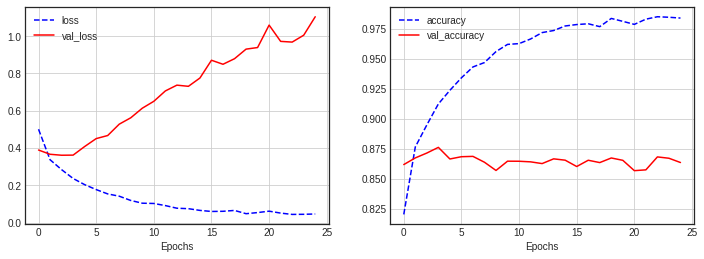

In [ ]:
hist_1.history.keys()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_1.history['loss'],'b--',label='loss')
plt.plot(hist_1.history['val_loss'], 'r', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_1.history['acc'],'b--',label='accuracy')
plt.plot(hist_1.history['val_acc'], 'r', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [ ]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2166 - acc: 0.8551


[1.2166025638580322, 0.8550999760627747]

### 모델 구성 및 학습 : 과대적합 방지
- 슬림한 모델로 변경

In [ ]:
def build_model2():
  model = Sequential()
  input = Input(shape=(28,28,1))
  output = Conv2D(filters=32, kernel_size=(3,3))(input)
  output = MaxPooling2D(strides=(2,2))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Dropout(0.4)(output)
  output = MaxPooling2D(strides=(2,2))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Dropout(0.4)(output)
  output = MaxPooling2D(strides=(2,2))(output)
  output = Flatten()(output)
  output = Dense(128,activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(64,activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(10,activation='softmax')(output)

  model = Model(inputs = [input], outputs=output)
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', # 예측값을 정수로 처리
                metrics=['acc'])
  return model 
model_2 = build_model2()
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                       

In [ ]:
hist_2=model_2.fit(x_train,y_train,
                   epochs=40,
                   validation_split=0.3,
                   batch_size=128)

Epoch 1/40
329/329 [==============================] - 3s 7ms/step - loss: 1.1761 - acc: 0.5659 - val_loss: 0.6973 - val_acc: 0.7533
Epoch 2/40
329/329 [==============================] - 2s 6ms/step - loss: 0.7318 - acc: 0.7366 - val_loss: 0.6047 - val_acc: 0.7814
Epoch 3/40
329/329 [==============================] - 2s 6ms/step - loss: 0.6473 - acc: 0.7686 - val_loss: 0.5718 - val_acc: 0.7873
Epoch 4/40
329/329 [==============================] - 2s 6ms/step - loss: 0.6019 - acc: 0.7847 - val_loss: 0.5165 - val_acc: 0.8074
Epoch 5/40
329/329 [==============================] - 2s 6ms/step - loss: 0.5766 - acc: 0.7968 - val_loss: 0.5148 - val_acc: 0.8078
Epoch 6/40
329/329 [==============================] - 2s 6ms/step - loss: 0.5506 - acc: 0.8060 - val_loss: 0.5246 - val_acc: 0.8004
Epoch 7/40
329/329 [==============================] - 2s 6ms/step - loss: 0.5252 - acc: 0.8157 - val_loss: 0.5084 - val_acc: 0.8094
Epoch 8/40
329/329 [==============================] - 2s 6ms/step - loss: 0.

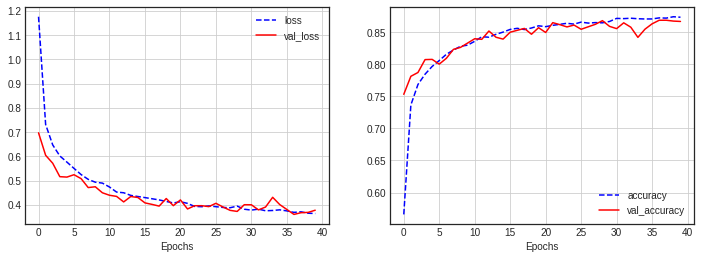

In [ ]:
hist_2.history.keys()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_2.history['loss'],'b--',label='loss')
plt.plot(hist_2.history['val_loss'], 'r', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_2.history['acc'],'b--',label='accuracy')
plt.plot(hist_2.history['val_acc'], 'r', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [ ]:
from keras.layers import BatchNormalization

In [ ]:
def build_model3():
  model = Sequential()
  input = Input(shape=(28,28,1))
  output = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(input)
  output = BatchNormalization()(output)
  output = Conv2D(filters=64, kernel_size=3, activation='relu', padding='valid')(output)
  output = Dropout(0.5)(output)
  output = MaxPooling2D(strides=(2,2))(output)

  output = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(output)
  output = BatchNormalization()(output)
  output = Conv2D(filters=128, kernel_size=3, activation='relu', padding='valid')(output)
  output = Dropout(0.5)(output)
  output = MaxPooling2D(strides=(2,2))(output)
  
  output = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(output)
  output = BatchNormalization()(output)
  output = Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid')(output)
  output = Dropout(0.5)(output)
  output = MaxPooling2D(strides=(2,2))(output)

  output = Flatten()(output)
  output = Dense(512,activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(256,activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(10,activation='softmax')(output)

  model = Model(inputs = [input], outputs=output)
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', # 예측값을 정수로 처리
                metrics=['acc'])
  return model 
model_3 = build_model3()
model_3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_21 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 dropout_9 (Dropout)         (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                       

In [ ]:
hist_3=model_3.fit(x_train,y_train,
                   epochs=25,
                   validation_split=0.3,
                   batch_size=128)

Epoch 1/25
329/329 [==============================] - 10s 27ms/step - loss: 0.7452 - acc: 0.7355 - val_loss: 2.2161 - val_acc: 0.1959
Epoch 2/25
329/329 [==============================] - 8s 25ms/step - loss: 0.4331 - acc: 0.8489 - val_loss: 1.1055 - val_acc: 0.5976
Epoch 3/25
329/329 [==============================] - 8s 25ms/step - loss: 0.3679 - acc: 0.8731 - val_loss: 0.7392 - val_acc: 0.7862
Epoch 4/25
329/329 [==============================] - 8s 25ms/step - loss: 0.3303 - acc: 0.8862 - val_loss: 0.6911 - val_acc: 0.8226
Epoch 5/25
329/329 [==============================] - 8s 25ms/step - loss: 0.3101 - acc: 0.8921 - val_loss: 0.5651 - val_acc: 0.8502
Epoch 6/25
329/329 [==============================] - 8s 25ms/step - loss: 0.2920 - acc: 0.8987 - val_loss: 0.4771 - val_acc: 0.8949
Epoch 7/25
329/329 [==============================] - 8s 25ms/step - loss: 0.2783 - acc: 0.9043 - val_loss: 0.5674 - val_acc: 0.8392
Epoch 8/25
329/329 [==============================] - 8s 25ms/step -

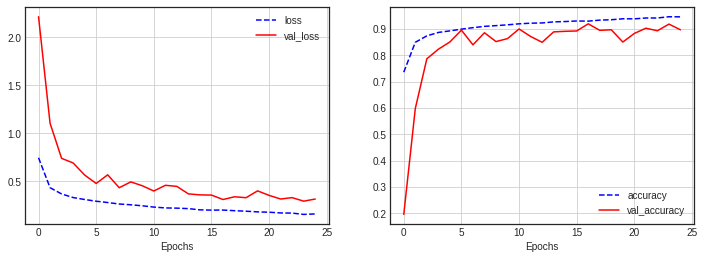

In [ ]:
hist_3.history.keys()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_3.history['loss'],'b--',label='loss')
plt.plot(hist_3.history['val_loss'], 'r', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_3.history['acc'],'b--',label='accuracy')
plt.plot(hist_3.history['val_acc'], 'r', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [ ]:
model_3.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3256 - acc: 0.8927


[0.3255772888660431, 0.8927000164985657]

### 모델 성능 높이기 : Image Augmentation


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.2,
    shear_range = 0.6,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False
)
augment_size = 200
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [ ]:
x_augment = image_generator.flow(np.tile(x_train[0].reshape(28*28*1),augment_size).reshape(-1,28,28,1),
                                 np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

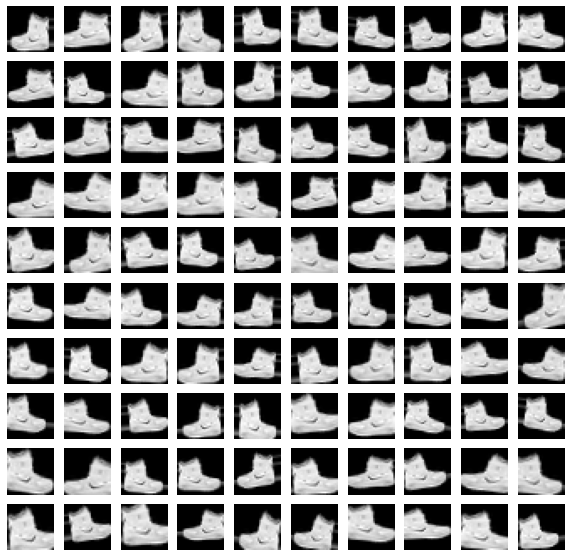

In [ ]:
plt.figure(figsize=(10,10))
for i in range(1,101):
  plt.subplot(10,10,i)
  plt.axis('off')
  plt.imshow(x_augment[i-1].reshape(28,28),cmap='gray')

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range = 15,
    zoom_range = 0.1,
    shear_range = 0.6,
    width_shift_range = 0.15,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False
)

augment_size = 30000
random_mask = np.random.randint(x_train.shape[0],size=augment_size)
x_augmented = x_train[random_mask].copy()
y_augmented = y_train[random_mask].copy()

In [ ]:
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size,shuffle=False).next()[0]

In [ ]:
x_train = np.concatenate((x_train,x_augmented))
y_train = np.concatenate((y_train,y_augmented))
print(x_train.shape)
print(y_train.shape)

(90000, 28, 28, 1)
(90000,)


In [ ]:
model_4 = build_model3() 
model_4.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_27 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 dropout_14 (Dropout)        (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                       

In [ ]:
hist_4 = model_4.fit(x_train,y_train,
                     epochs=40,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/40
493/493 [==============================] - 14s 26ms/step - loss: 0.7166 - acc: 0.7415 - val_loss: 2.5523 - val_acc: 0.1058
Epoch 2/40
493/493 [==============================] - 12s 25ms/step - loss: 0.4232 - acc: 0.8525 - val_loss: 1.2976 - val_acc: 0.5853
Epoch 3/40
493/493 [==============================] - 12s 25ms/step - loss: 0.3528 - acc: 0.8791 - val_loss: 1.3127 - val_acc: 0.5438
Epoch 4/40
493/493 [==============================] - 12s 25ms/step - loss: 0.3228 - acc: 0.8885 - val_loss: 1.1867 - val_acc: 0.6469
Epoch 5/40
493/493 [==============================] - 12s 25ms/step - loss: 0.3012 - acc: 0.8960 - val_loss: 1.1903 - val_acc: 0.6104
Epoch 6/40
493/493 [==============================] - 12s 25ms/step - loss: 0.2817 - acc: 0.9017 - val_loss: 1.3258 - val_acc: 0.5845
Epoch 7/40
493/493 [==============================] - 12s 25ms/step - loss: 0.2712 - acc: 0.9069 - val_loss: 0.9571 - val_acc: 0.7013
Epoch 8/40
493/493 [==============================] - 12s 25ms

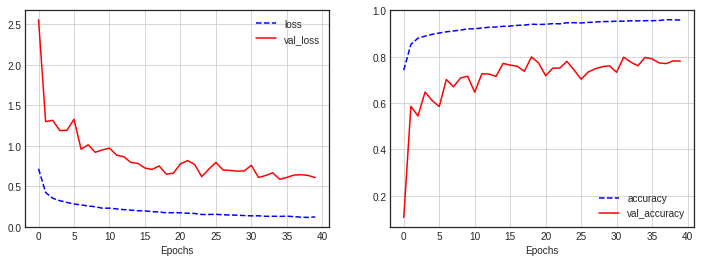

In [ ]:
hist_4.history.keys()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_4.history['loss'],'b--',label='loss')
plt.plot(hist_4.history['val_loss'], 'r', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_4.history['acc'],'b--',label='accuracy')
plt.plot(hist_4.history['val_acc'], 'r', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [ ]:
model_4.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2697 - acc: 0.9043


[0.26966264843940735, 0.9042999744415283]

# CNN 모델의 발전

* 1998: LeNet – Gradient-based Learning Applied to Document Recognition
* 2012: AlexNet – ImageNet Classification with Deep Convolutional Neural Network
* **2014: VggNet – Very Deep Convolutional Networks for Large-Scale Image Recognition**
* **2014: GooLeNet – Going Deeper with Convolutions**
* 2014: SppNet – Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition
* **2015: ResNet – Deep Residual Learning for Image Recognition**
* **2016: Xception – Xception: Deep Learning with Depthwise Separable Convolutions**
* **2017: MobileNet – MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Application**
* **2017: DenseNet – Densely Connected Convolutional Networks**
* 2017: SeNet – Squeeze and Excitation Networks
* 2017: ShuffleNet – ShuffleNet: An Extremely Efficient Convolutional Neural Network for Mobile Devices
* **2018: NasNet – Learning Transferable Architectures for Scalable Image Recognition**
* 2018: Bag of Tricks – Bag of Tricks for Image Classification with Convolutional Neural Networks
* **2019: EfficientNet – EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks**


### VGGNet

- 특징
  - 활성화 함수로 `ReLU` 사용, Dropout 적용
  - 합성곱과 풀링 계층으로 구성된 블록과 분류를 위한 완전 연결계층으로 결합된 전형적인 구조
  - 이미지 변환, 좌우 반전 등의 변환을 시도하여 인위적으로 데이터셋을 늘림
  - 몇 개의 합성곱 계층과 최대-풀링 계층이 따르는 5개의 블록과, 3개의 완전연결계층(학습 시, 드롭아웃 사용)으로 구성
  - 모든 합성곱과 최대-풀링 계층에 `padding='SAME'` 적용
  - 합성곱 계층에는 `stride=1`, 활성화 함수로 `ReLU` 사용
  - 특징 맵 깊이를 증가시킴
  - 척도 변경을 통한 데이터 보강(Data Augmentation)

- 기여

  - 3x3 커널을 갖는 두 합성곱 계층을 쌓은 스택이 5x5 커널을 갖는 하나의 합성곱 계층과 동일한 수용영역(ERF)을 가짐
  - 11x11 사이즈의 필터 크기를 가지는 AlexNet과 비교하여, 더 작은 합성곱 계층을 더 많이 포함해 더 큰 ERF를 얻음
  - 합성곱 계층의 개수가 많아지면, 매개변수 개수를 줄이고, 비선형성을 증가시킴


In [2]:
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

vggnet = VGG19(include_top=True, weights='imagenet',
               input_tensor=None, input_shape=None,
               pooling=None, classes=1000)
vggnet.summary()

574710816/574710816 [==============================] - 36s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [3]:
!wget -O dog.jpg https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg


--2022-11-11 02:19:10--  https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg
Resolving www.publicdomainpictures.net (www.publicdomainpictures.net)... 104.20.44.162, 104.20.45.162, 172.67.2.204, ...
Connecting to www.publicdomainpictures.net (www.publicdomainpictures.net)|104.20.44.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94395 (92K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  92.18K  --.-KB/s    in 0.004s  

2022-11-11 02:19:11 (25.3 MB/s) - ‘dog.jpg’ saved [94395/94395]



35363/35363 [==============================] - 0s 0us/step
[[('n02088364', 'beagle', 0.8393818), ('n02089973', 'English_foxhound', 0.0883476), ('n02089867', 'Walker_hound', 0.062388174), ('n02088238', 'basset', 0.0045650755), ('n02088632', 'bluetick', 0.003339454)]]


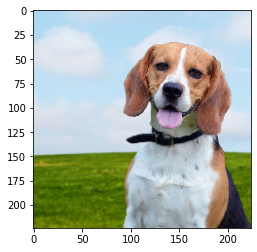

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf

img = tf.keras.preprocessing.image.load_img('dog.jpg', target_size=(224,224))
plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
x = preprocess_input(x)
preds = vggnet.predict(x)
print(decode_predictions(preds))


### GoogLeNet, Inception
- VGGNet을 제치고 같은 해 분류 과제에서 1등을 차지
- 인셉션 블록이라는 개념을 도입하여 인셉션 네크워크라고도 불림

<img src="https://miro.medium.com/max/2800/0*rbWRzjKvoGt9W3Mf.png">

- 특징 
  - CNN 계산 용량을 최적화하는 것을 고려
  - 전형적인 합성곱, 풀링 계층으로 시작하고, 이 정보는 9개의 인셉션 모듈 스택을 통과 (해당 모듈을 하위 네트워크라고도 함)
  - 각 모듈에서 입력 특징 맵은 서로 다른 계층으로 구성된 4개의 병렬 하위 블록에 전달되고, 이를 서로 다시 연결
  - 모든 합성곱과 풀링 계층의 `padding`옵션은 `'SAME'`이며 `stride=1` 활성화 함수는 `ReLU` 사용

- 기여
  - 규모가 큰 블록과 병목을 보편화
  - 병목 계층으로 1x1 합성곱 계층 사용
  - 완전 연결 계층 대신 풀링 계층 사용
  - 중간 소실로 경사 소실 문제 해결

  <img src="https://norman3.github.io/papers/images/google_inception/f01.png">


In [5]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

inception = InceptionV3(include_top=True, weights='imagenet',
               input_tensor=None, input_shape=None,
               pooling=None, classes=1000)
inception.summary()

96112376/96112376 [==============================] - 7s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

In [6]:
!wget -O fish.jpg https://upload.wikimedia.org/wikipedia/commons/7/7a/Goldfish_1.jpg


--2022-11-11 02:32:31--  https://upload.wikimedia.org/wikipedia/commons/7/7a/Goldfish_1.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4648040 (4.4M) [image/jpeg]
Saving to: ‘fish.jpg’

fish.jpg            100%[===================>]   4.43M  29.1MB/s    in 0.2s    

2022-11-11 02:32:32 (29.1 MB/s) - ‘fish.jpg’ saved [4648040/4648040]



1/1 [==============================] - 2s 2s/step
[[('n01443537', 'goldfish', 0.9748303), ('n02701002', 'ambulance', 0.0023265795), ('n02606052', 'rock_beauty', 0.0019084793), ('n02607072', 'anemone_fish', 0.00066402595), ('n09256479', 'coral_reef', 0.0004321773)]]


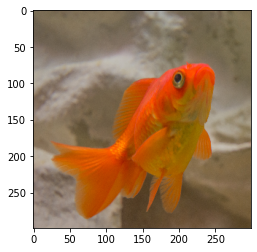

In [7]:

img = tf.keras.preprocessing.image.load_img('fish.jpg', target_size=(299,299))
plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
x = preprocess_input(x)
preds = inception.predict(x)
print(decode_predictions(preds))

### ResNet(Residual Net)

- 네트워크의 깊이가 깊어질수록 경사가 소실되거나 폭발하는 문제를 해결하고자 함
- 병목 합성곱 계층을 추가하거나 크기가 작은 커널을 사용
- 152개의 훈련가능한 계층을 수직으로 연결하여 구성
- 모든 합성곱과 풀링 계층에서 패딩옵셥으로 `'SAME'`, `stride=1` 사용
- 3x3 합성곱 계층 다음마다 배치 정규화 적용, 1x1 합성곱 계층에는 활성화 함수가 존재하지 않음

  <img src="https://miro.medium.com/max/1200/1*6hF97Upuqg_LdsqWY6n_wg.png">


In [14]:
# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.applications.resnet import ResNet50, preprocess_input, decode_predictions
resnet = ResNet50(include_top=True, weights='imagenet',
               input_tensor=None, input_shape=None,
               pooling=None, classes=1000)
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [15]:
!wget -O bee.jpg https://upload.wikimedia.org/wikipedia/commons/4/4d/Apis_mellifera_Western_honey_bee.jpg


--2022-11-11 02:47:58--  https://upload.wikimedia.org/wikipedia/commons/4/4d/Apis_mellifera_Western_honey_bee.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2421052 (2.3M) [image/jpeg]
Saving to: ‘bee.jpg’

bee.jpg             100%[===================>]   2.31M  --.-KB/s    in 0.08s   

2022-11-11 02:47:58 (29.1 MB/s) - ‘bee.jpg’ saved [2421052/2421052]



1/1 [==============================] - 1s 1s/step
[[('n02206856', 'bee', 0.9990995), ('n03530642', 'honeycomb', 0.0005614693), ('n02190166', 'fly', 0.00014320065), ('n02727426', 'apiary', 0.00010164107), ('n02219486', 'ant', 5.7395835e-05)]]


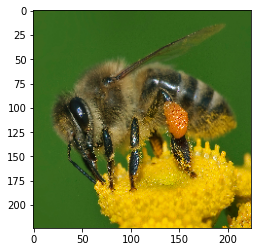

In [16]:
img = tf.keras.preprocessing.image.load_img('bee.jpg', target_size=(224,224))
plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
x = preprocess_input(x)
preds = resnet.predict(x)
print(decode_predictions(preds))

### Xception

기존의 Conv layer에서 얻은 feature map을 각 채널별로 다른 Conv layer에 적용하여 feature map을 얻음 

https://velog.io/@joy5075/paper-review-Xception-Deep-Learning-with-Depthwise-Separable-Convolutions

In [20]:
from keras.applications.xception import Xception, preprocess_input, decode_predictions
xception = Xception(include_top=True, weights='imagenet',
               input_tensor=None, input_shape=None,
               pooling=None, classes=1000)
xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [19]:
!wget -O beaver.jpg https://upload.wikimedia.org/wikipedia/commons/6/6b/American_Beaver.jpg


--2022-11-11 03:35:20--  https://upload.wikimedia.org/wikipedia/commons/6/6b/American_Beaver.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186747 (182K) [image/jpeg]
Saving to: ‘beaver.jpg’

beaver.jpg          100%[===================>] 182.37K  --.-KB/s    in 0.007s  

2022-11-11 03:35:20 (26.0 MB/s) - ‘beaver.jpg’ saved [186747/186747]



1/1 [==============================] - 1s 968ms/step
[[('n02363005', 'beaver', 0.82783943), ('n02361337', 'marmot', 0.059819862), ('n02493509', 'titi', 0.004426797), ('n02442845', 'mink', 0.0024072072), ('n01883070', 'wombat', 0.001986879)]]


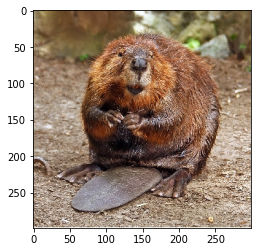

In [21]:
img = tf.keras.preprocessing.image.load_img('beaver.jpg', target_size=(299,299))
plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
x = preprocess_input(x)
preds = xception.predict(x)
print(decode_predictions(preds))

### MobileNet

- 성능보다 모델의 크기 또는 연산 속도 감소
- Depthwise conv와 Pointwise conv 사이에도 batch normalization과 ReLU를 삽입
- Conv layer를 활용한 모델과 정확도는 비슷하면서 계산량은 9배, 파라미터 수는 7배 줄임

In [22]:
from keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions
mobilenet = MobileNet(include_top=True, weights='imagenet',
               input_tensor=None, input_shape=None,
               pooling=None, classes=1000)
mobilenet.summary()

17225924/17225924 [==============================] - 3s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [23]:
!wget -O crane.jpg https://p1.pxfuel.com/preview/42/50/534/europe-channel-crane-harbour-crane-harbour-cranes-cranes-transport.jpg


--2022-11-11 03:42:24--  https://p1.pxfuel.com/preview/42/50/534/europe-channel-crane-harbour-crane-harbour-cranes-cranes-transport.jpg
Resolving p1.pxfuel.com (p1.pxfuel.com)... 172.67.169.122, 104.21.71.48, 2606:4700:3035::ac43:a97a, ...
Connecting to p1.pxfuel.com (p1.pxfuel.com)|172.67.169.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86911 (85K) [image/jpeg]
Saving to: ‘crane.jpg’

crane.jpg           100%[===================>]  84.87K  --.-KB/s    in 0.003s  

2022-11-11 03:42:24 (28.9 MB/s) - ‘crane.jpg’ saved [86911/86911]



1/1 [==============================] - 1s 703ms/step
[[('n03126707', 'crane', 0.96001226), ('n03216828', 'dock', 0.029438462), ('n03240683', 'drilling_platform', 0.0051290323), ('n03344393', 'fireboat', 0.0026267457), ('n04366367', 'suspension_bridge', 0.00050067576)]]


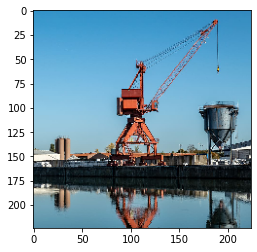

In [24]:
img = tf.keras.preprocessing.image.load_img('crane.jpg', target_size=(224,224))
plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
x = preprocess_input(x)
preds = mobilenet.predict(x)
print(decode_predictions(preds))

### 과제_1111_1
- DenseNet 을 적용하여 분류 과제를 수행하세요(224,224)
- !wget -O zebra.jpg https://upload.wikimedia.org/wikipedia/commons/f/f0/Zebra_standing_alone_crop.jpg

- NASNetLarge를 적용하여 분류 과제를 수행하세요(331,331)
- !wget -O notebook.jpg https://cdn.pixabay.com/photo/2016/07/11/03/35/macbook-1508998_1280.jpg

- EfficientNetB1을 적용하여 분류 과제를 수행하세요(240,240)
- !wget -O plane.jpg https://upload.wikimedia.org/wikipedia/commons/1/12/Plane-in-flight.jpg


